In [1]:
%load_ext autoreload
%autoreload 2

## Environment Setup (for Colab)

In [ ]:
import os
from datetime import datetime

os.chdir('/content')
current_time = datetime.utcnow().isoformat().replace(':', '_')
os.makedirs(os.path.join(current_time))
os.chdir(f'./{current_time}')
WORKSPACE = 'random_sampling'

!git clone https://github.com/lng-ng/random_sampling.git

os.chdir(f'./{WORKSPACE}')

!pip install -r requirements.txt

## Download required data for the experiment

In [2]:
import gdown
import os
data_folder = os.path.join("expr2_data")
drive_folderid = "1LR0ZkJm5TGKOejQCbIk9a88mADn0_Y87"
gdown.download_folder(id=drive_folderid)

Retrieving folder contents


Processing file 10iWEr9KkUFYqEPk_LEP1H1zGYHvk97da diabetes_anonymized_arx250.csv
Processing file 1Ril2L11-0EqUkNpJBtLH076suHKAm8Jq preprocessed_diabetes.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=10iWEr9KkUFYqEPk_LEP1H1zGYHvk97da
To: F:\Informatik\tkhiwi\random_sampling\expr2_data\diabetes_anonymized_arx250.csv
100%|█████████████████████████████████████████████████████████████████████████████| 4.56M/4.56M [00:00<00:00, 10.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ril2L11-0EqUkNpJBtLH076suHKAm8Jq
To: F:\Informatik\tkhiwi\random_sampling\expr2_data\preprocessed_diabetes.csv
100%|█████████████████████████████████████████████████████████████████████████████| 4.50M/4.50M [00:00<00:00, 10.4MB/s]
Download completed


['F:\\Informatik\\tkhiwi\\random_sampling\\expr2_data\\diabetes_anonymized_arx250.csv',
 'F:\\Informatik\\tkhiwi\\random_sampling\\expr2_data\\preprocessed_diabetes.csv']

## Run the experiment

In [6]:
import numpy as np
import pandas as pd
import os
import tqdm
import matplotlib.pyplot as plt

from random_sampling import random_deletion
from utils.stats import get_stats

In [7]:
# Load datasets
load_path_anonymized = os.path.join(data_folder, 'diabetes_anonymized_arx250.csv')
load_path_original = os.path.join(data_folder, 'preprocessed_diabetes.csv')

dfo = pd.read_csv(load_path_original)
df = pd.read_csv(load_path_anonymized)

qids = ['gender', 'age', 'bmi']
ages = np.arange(0, 110, 20)
qid_ticks = {
    'gender': ['Female', 'Male'],
    'age': [pd.Interval(ages[i], ages[i + 1], closed='left') for i in range(len(ages) - 1)],
    'bmi': [pd.Interval(10, 30, closed='left'), pd.Interval(30, 50, closed='left')],
}
cat_sas = ['diabetes', 'hypertension', 'heart_disease', 'smoking_history']
numerical_sas = ['HbA1c_level', 'blood_glucose_level']
sa_ticks = {}
for val in cat_sas:
    sa_ticks[val] = df[val].unique()

dfs = {
    'Original Dataset': dfo,
    'Only K-Anonymity': df
}
p = 0.5
print("--Sampling the dataset 10 times--")
for i in tqdm.tqdm(range(10)):
    sampled_df = random_deletion(df, p, qids)
    dfs[f'Random Deletion {i}'] = sampled_df

--Sampling the dataset 10 times--


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.12it/s]


### Figure 7: The average blood glucose level within different age ranges (𝑘=250, Sampling percentage=50%)

In [8]:
qid = 'age'
sa = 'blood_glucose_level'
stats = get_stats(dfs, qid, sa, qid_ticks, sa_ticks, sa in cat_sas)
stats

,Original Dataset,Only K-Anonymity,Random Deletion 0,Random Deletion 1,Random Deletion 2,Random Deletion 3,Random Deletion 4,Random Deletion 5,Random Deletion 6,Random Deletion 7,Random Deletion 8,Random Deletion 9,Random Deletion (average)
age,,,,,,,,,,,,,
"[0, 20)",133.067521,133.060641,133.231160,133.008512,132.502076,132.690264,133.180195,133.341499,133.169919,132.753373,133.493772,132.935956,133.030673
"[20, 40)",134.136760,134.033378,134.190320,134.223449,134.009947,134.187892,134.291902,133.979010,133.897321,134.174264,133.955044,133.875940,134.078509
"[40, 60)",138.766345,138.677818,138.624072,138.243741,138.987208,139.014580,138.605983,138.871183,139.093535,138.869395,138.860935,138.797937,138.796857
"[60, 80)",145.580992,145.424321,145.695963,144.949258,145.562831,145.349694,145.432915,145.379786,146.116011,146.413407,145.583688,145.490298,145.597385
"[80, 100)",143.810176,143.819266,143.843605,143.194157,144.193445,144.257214,144.442822,143.469540,143.589597,143.467047,143.922693,143.206983,143.758710


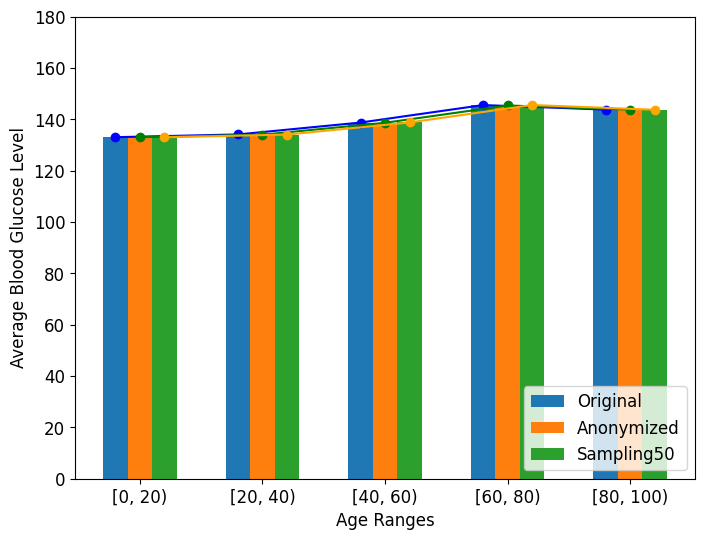

In [9]:
# Age ranges
age_ranges = ['[0, 20)', '[20, 40)', '[40, 60)', '[60, 80)', '[80, 100)']

# Data for each age range
original = stats['Original Dataset']
k_anonymity = stats['Only K-Anonymity']
random_deletion_average = stats['Random Deletion (average)']

# Set the width of the bars
bar_width = 0.2

# Create an array of age range positions for the x-axis
age_range_positions = range(len(age_ranges))

plt.figure(figsize=(8, 6))
# Create the grouped bar chart
original_bars = plt.bar(age_range_positions, original, bar_width, label='Original')
anonymized_bars = plt.bar([x + bar_width for x in age_range_positions], k_anonymity, bar_width, label='Anonymized')
sampling50_bars = plt.bar([x + 2 * bar_width for x in age_range_positions], random_deletion_average, bar_width, label='Sampling50')

# Calculate the centers of the bars
original_centers = [rect.get_x() + rect.get_width() / 2 for rect in original_bars]
anonymized_centers = [rect.get_x() + rect.get_width() / 2 for rect in anonymized_bars]
sampling50_centers = [rect.get_x() + rect.get_width() / 2 for rect in sampling50_bars]

# Draw lines connecting the centers of bars
plt.plot(original_centers, original, marker='o', color='blue')
plt.plot(anonymized_centers, k_anonymity, marker='o', color='green')
plt.plot(sampling50_centers, random_deletion_average, marker='o', color='orange')

# Set x-axis labels
plt.xticks([x + bar_width for x in age_range_positions], age_ranges, fontsize=12)
plt.yticks(fontsize=12)

# Set the chart labels and title
plt.xlabel('Age Ranges',fontsize=12)
plt.ylabel('Average Blood Glucose Level',fontsize=12)

# Add a legend
plt.legend(loc='lower right',fontsize=12)

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)

plt.ylim(0, 180)
# Show the plot
#plt.grid(True)
# Show the plot
plt.show()


### Figure 8: The average number of people with hypertension within different gender groups (𝑘=250, Sampling percentage=50%)

In [10]:
qid = 'gender'
sa = 'hypertension'
stats = get_stats(dfs, qid, sa, qid_ticks, sa_ticks, sa in cat_sas)
plot_data = stats[stats.index.isin([1], level=1)]
plot_data

,,Original Dataset,Only K-Anonymity,Random Deletion 0,Random Deletion 1,Random Deletion 2,Random Deletion 3,Random Deletion 4,Random Deletion 5,Random Deletion 6,Random Deletion 7,Random Deletion 8,Random Deletion 9,Random Deletion (average)
gender,hypertension,,,,,,,,,,,,,
Female,1,4197,4197.0,2145.0,2113.0,2124.0,2134.0,2127.0,2100.0,2096.0,2098.0,2039.0,2056.0,2103.2
Male,1,3288,3288.0,1671.0,1618.0,1636.0,1601.0,1640.0,1625.0,1655.0,1654.0,1631.0,1558.0,1628.9


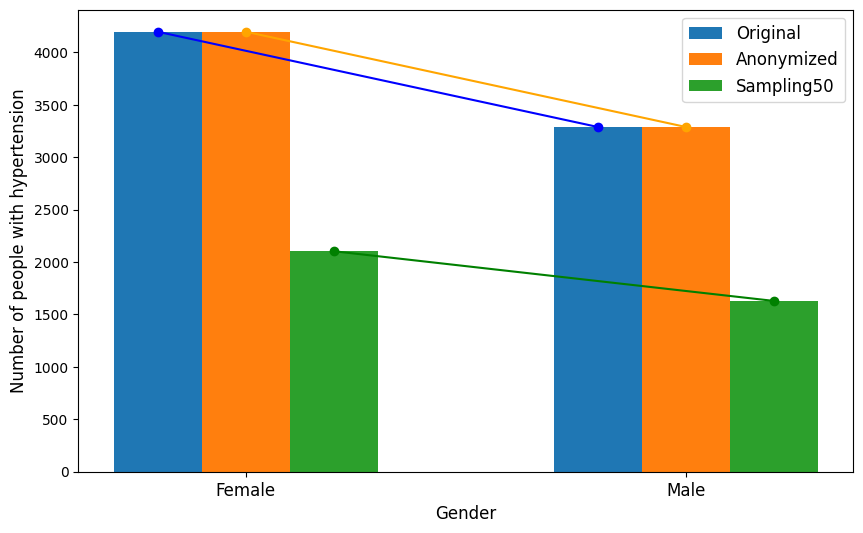

In [11]:

# Gender categories
genders = ['Female', 'Male']

# Data for each gender (hypertension=1)
hypertension_1_original = plot_data['Original Dataset']
hypertension_1_k_anonymity = plot_data['Only K-Anonymity']
hypertension_1_random_deletion_average = plot_data['Random Deletion (average)']

# Set the width of the bars
bar_width = 0.2

# Create an array of gender positions for the x-axis
gender_positions = np.arange(len(genders))

# Create the grouped bar chart for hypertension=1
plt.figure(figsize=(10, 6))
hypertension_1_original_bars = plt.bar(gender_positions - bar_width, hypertension_1_original, bar_width, label='Original')
hypertension_1_k_anonymity_bars = plt.bar(gender_positions, hypertension_1_k_anonymity, bar_width, label='Anonymized')
hypertension_1_random_deletion_average_bars = plt.bar(gender_positions + bar_width, hypertension_1_random_deletion_average, bar_width, label='Sampling50')

# Calculate the centers of the bars for hypertension=1
hypertension_1_original_centers = [rect.get_x() + rect.get_width() / 2 for rect in hypertension_1_original_bars]
hypertension_1_k_anonymity_centers = [rect.get_x() + rect.get_width() / 2 for rect in hypertension_1_k_anonymity_bars]
hypertension_1_random_deletion_average_centers = [rect.get_x() + rect.get_width() / 2 for rect in hypertension_1_random_deletion_average_bars]

# Draw lines connecting the centers of bars for hypertension=1
plt.plot(hypertension_1_original_centers, hypertension_1_original, marker='o', color='blue')
plt.plot(hypertension_1_k_anonymity_centers, hypertension_1_k_anonymity, marker='o', color='orange')
plt.plot(hypertension_1_random_deletion_average_centers, hypertension_1_random_deletion_average, marker='o', color='green')

# Set x-axis labels
plt.xticks(gender_positions, genders, fontsize=12)

# Set the chart labels and title for hypertension=1
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of people with hypertension', fontsize=12)

# Add a legend for hypertension=1
plt.legend(fontsize=12)

# Show the plot for hypertension=1
plt.show()


### Figure 9: The average number of people with diabetes within different age ranges (𝑘=250, Sampling percentage=50%)

In [12]:
qid = 'age'
sa = 'diabetes'
stats = get_stats(dfs, qid, sa, qid_ticks, sa_ticks, sa in cat_sas)
plot_data = stats[stats.index.isin([1], level=1)]
plot_data

,,Original Dataset,Only K-Anonymity,Random Deletion 0,Random Deletion 1,Random Deletion 2,Random Deletion 3,Random Deletion 4,Random Deletion 5,Random Deletion 6,Random Deletion 7,Random Deletion 8,Random Deletion 9,Random Deletion (average)
age,diabetes,,,,,,,,,,,,,
"[0, 20)",1,106,102,44,58,51,51,54,52,51,45,51,48,50.5
"[20, 40)",1,604,569,295,265,313,293,279,257,278,278,272,274,280.4
"[40, 60)",1,2858,2786,1384,1409,1401,1418,1387,1345,1401,1389,1405,1395,1393.4
"[60, 80)",1,3908,3836,1932,1909,1945,1891,1909,1927,1946,1940,1939,1907,1924.5
"[80, 100)",1,1024,1023,489,508,528,530,516,514,507,509,512,514,512.7


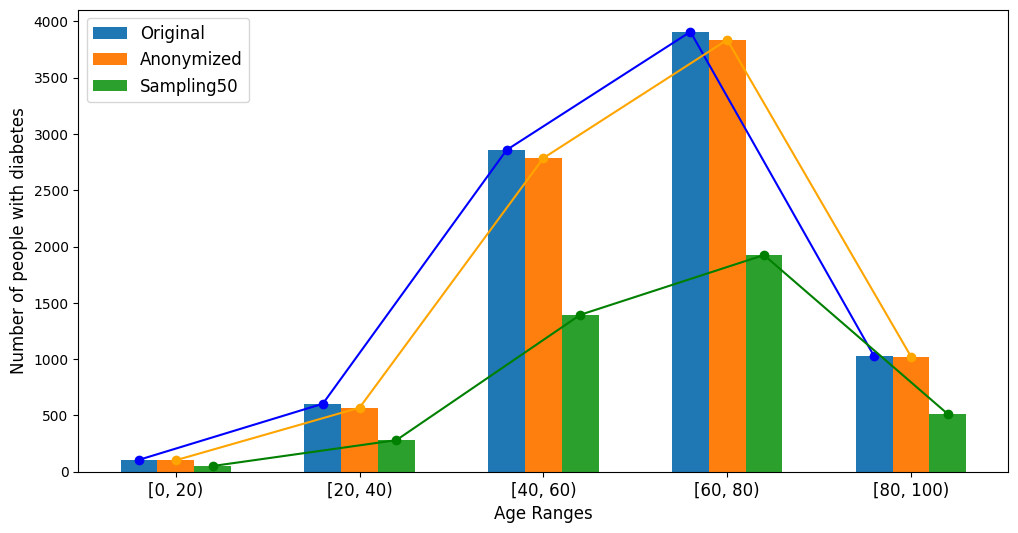

In [13]:
# Age ranges
age_ranges = ['[0, 20)', '[20, 40)', '[40, 60)', '[60, 80)', '[80, 100)']

# Data for each age range (diabetes=1)
diabetes_1_original = plot_data['Original Dataset']
diabetes_1_k_anonymity = plot_data['Only K-Anonymity']
diabetes_1_random_deletion_average = plot_data['Random Deletion (average)']

# Set the width of the bars
bar_width = 0.2

# Create an array of age range positions for the x-axis
age_range_positions = np.arange(len(age_ranges))

# Create the grouped bar chart for diabetes=1
plt.figure(figsize=(12, 6))
diabetes_1_original_bars = plt.bar(age_range_positions - bar_width, diabetes_1_original, bar_width, label='Original')
diabetes_1_k_anonymity_bars = plt.bar(age_range_positions, diabetes_1_k_anonymity, bar_width, label='Anonymized')
diabetes_1_random_deletion_average_bars = plt.bar(age_range_positions + bar_width, diabetes_1_random_deletion_average, bar_width, label='Sampling50')

# Calculate the centers of the bars for diabetes=1
diabetes_1_original_centers = [rect.get_x() + rect.get_width() / 2 for rect in diabetes_1_original_bars]
diabetes_1_k_anonymity_centers = [rect.get_x() + rect.get_width() / 2 for rect in diabetes_1_k_anonymity_bars]
diabetes_1_random_deletion_average_centers = [rect.get_x() + rect.get_width() / 2 for rect in diabetes_1_random_deletion_average_bars]

# Draw lines connecting the centers of bars for diabetes=1
plt.plot(diabetes_1_original_centers, diabetes_1_original, marker='o', color='blue')
plt.plot(diabetes_1_k_anonymity_centers, diabetes_1_k_anonymity, marker='o', color='orange')
plt.plot(diabetes_1_random_deletion_average_centers, diabetes_1_random_deletion_average, marker='o', color='green')

# Set x-axis labels
plt.xticks(age_range_positions, age_ranges, fontsize=12)

# Set the chart labels and title for diabetes=1
plt.xlabel('Age Ranges', fontsize=12)
plt.ylabel('Number of people with diabetes', fontsize=12)
#plt.title('Grouped Bar Chart (Diabetes=1) by Age Ranges')

# Add a legend for diabetes=1
plt.legend(loc='upper left', fontsize=12)

# Show the plot for diabetes=1
plt.show()
